# Queries for species observed near the MARS observatory for comparison with eDNA data

## Requests
1. Depth distribution for Nanomia and Aeginura near MARS in June 2019
2. Obtain an average depth profile for Nanomia and Aeginura from VARS around the general region between M1/MidWater1 and MARS, down to 1000m

**Resources:**
- https://www.mbari.org/at-sea/cabled-observatory/
- https://www3.mbari.org/bog/roadmap/mooring_locations.htm

In [1]:
## Imports

import pandas as pd
import numpy as np

import re # for extracting logon info from text file

import jaydebeapi # for connecting to VARS db
import VARS # for connecting to VARS db

from datetime import datetime # for handling dates
import pytz # for handling time zones

In [2]:
## Extract logon information from text file

# Get list of each line in file
filename = 'VARS_logon_info.txt'
f = open(filename, 'r')
lines = f.readlines()
f.close()

# Function for extracting information from lines
def get_single_quoted_text(s):
    """ 
    Takes string s and returns any text in s that is between the first set of single quotes, removing whitespace. 
    
    Example:
    s = "What if there's more ' than one' sest of single' quotes?"
    get_single_quoted_text(s) --> 's more'
    
    """
    
    extracted_text = re.search('''(?<=')\s*[^']+?\s*(?=')''', s)
    return(extracted_text.group().strip())

# Assign logon info
dr = get_single_quoted_text(lines[2])
name = get_single_quoted_text(lines[3])
pw = get_single_quoted_text(lines[4])
un = get_single_quoted_text(lines[5])
url = get_single_quoted_text(lines[6])

## Request 1: Depth profile for Nanomia and Aeginura near MARS
### Obtain data from VARS

In [3]:
## Build SQL query

sql = """
        SELECT index_recorded_timestamp,
               observation_uuid,
               activity,
               concept,
               observation_group,
               observer,
               image_url,
               depth_meters,
               latitude,
               longitude,
               link_name,
               link_value,
               to_concept,
               associations,
               video_sequence_name,
               chief_scientist
        FROM annotations a
        WHERE index_recorded_timestamp >= CAST('2019-01-01' AS datetime) 
            AND index_recorded_timestamp <= CAST('2019-12-31' AS datetime)
            AND concept LIKE 'Nanomia%'
            OR concept LIKE 'Aeginidae%'
"""

In [4]:
## Query the database

# Get connection
conn = VARS.get_db_conn(dr, url, un, pw, name)

# Submit query
data = VARS.get_data(conn, sql)

# Close connection
conn.close()

In [5]:
## Check data is there

print(data.shape)
data.head()

(21127, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2019-11-08 20:06:39.588000,A330020B-8B9A-448D-7E61-D56C3426A01E,cruise,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,395.500000,36.747745,-122.103768,identity-reference,11,self,identity-reference | self | 11,Ventana 4231,None
1,2019-11-08 20:06:39.588000,A330020B-8B9A-448D-7E61-D56C3426A01E,cruise,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,395.500000,36.747745,-122.103768,comment,fishing,self,comment | self | fishing,Ventana 4231,None
2,2019-11-08 19:13:19.926000,63FD8390-01B0-4A2E-406F-C53ABD25A01E,descend,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,228.940002,36.744766,-122.101645,identity-reference,9,self,identity-reference | self | 9,Ventana 4231,None
3,2019-11-08 19:13:19.926000,63FD8390-01B0-4A2E-406F-C53ABD25A01E,descend,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,228.940002,36.744766,-122.101645,comment,fishing,self,comment | self | fishing,Ventana 4231,None
4,2019-11-08 20:06:08.308000,CA823634-41B2-41F9-3A6E-DF413326A01E,cruise,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,395.720001,36.747725,-122.103758,identity-reference,11,self,identity-reference | self | 11,Ventana 4231,None


In [6]:
## Add column names

data.rename(columns={
    0:'index_recorded_timestamp',
    1:'observation_uuid',
    2:'activity',
    3:'concept',
    4:'observation_group',
    5:'observer',
    6:'image_url',
    7:'depth_meters',
    8:'latitude',
    9:'longitude',
    10:'link_name',
    11:'link_value',
    12:'to_concept',
    13:'associations',
    14:'video_sequence_name',
    15:'chief_scientist'
}, inplace=True)

data.head()

,index_recorded_timestamp,observation_uuid,activity,concept,observation_group,observer,image_url,depth_meters,latitude,longitude,link_name,link_value,to_concept,associations,video_sequence_name,chief_scientist
0,2019-11-08 20:06:39.588000,A330020B-8B9A-448D-7E61-D56C3426A01E,cruise,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,395.500000,36.747745,-122.103768,identity-reference,11,self,identity-reference | self | 11,Ventana 4231,None
1,2019-11-08 20:06:39.588000,A330020B-8B9A-448D-7E61-D56C3426A01E,cruise,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,395.500000,36.747745,-122.103768,comment,fishing,self,comment | self | fishing,Ventana 4231,None
2,2019-11-08 19:13:19.926000,63FD8390-01B0-4A2E-406F-C53ABD25A01E,descend,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,228.940002,36.744766,-122.101645,identity-reference,9,self,identity-reference | self | 9,Ventana 4231,None
3,2019-11-08 19:13:19.926000,63FD8390-01B0-4A2E-406F-C53ABD25A01E,descend,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,228.940002,36.744766,-122.101645,comment,fishing,self,comment | self | fishing,Ventana 4231,None
4,2019-11-08 20:06:08.308000,CA823634-41B2-41F9-3A6E-DF413326A01E,cruise,Nanomia bijuga,ROV,robs,http://search.mbari.org/ARCHIVE/framegrabs/Ven...,395.720001,36.747725,-122.103758,identity-reference,11,self,identity-reference | self | 11,Ventana 4231,None


### Plot locations

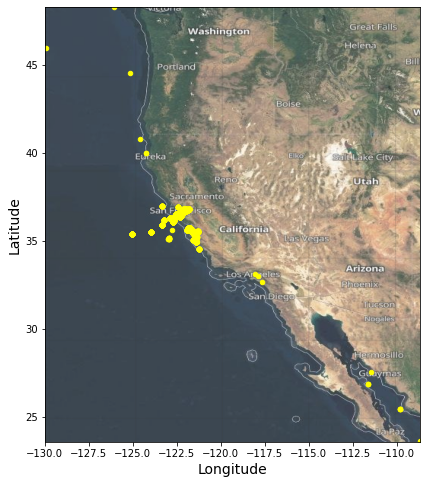

In [7]:
## Plot lat, lons

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

california_img=mpimg.imread('North America West Coast.png')
ax = data.plot(kind="scatter", x="longitude", y="latitude", figsize=(12, 8), color='yellow')

plt.imshow(california_img, extent=[-130, -108.71, 23.6, 48.31], alpha=0.8)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.show()

## Filter by location

In [8]:
## Filter by location

mars = data[(data['latitude'] < 36.7430) & (data['latitude'] > 36.6747) & (data['longitude'] < -122.1358) & (data['longitude'] > -122.2371)]

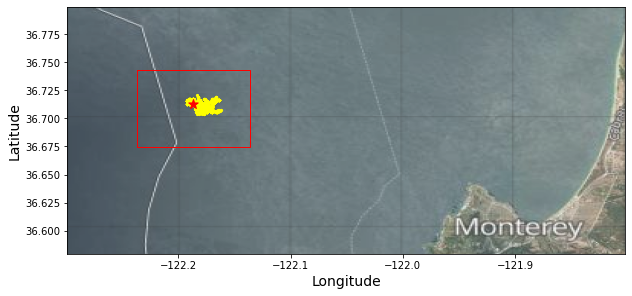

In [9]:
## Plot

import matplotlib.patches as patches

mars_img=mpimg.imread('mars.png')
ax = mars.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 8), color='yellow', marker='.')

plt.scatter(-122.1869, 36.7125, color='red', marker='*', s=100)

rect = patches.Rectangle((-122.2371, 36.6747), 0.1013, 0.0683, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.imshow(mars_img, extent=[-122.298924, -121.801921, 36.579387, 36.799502], alpha=0.8)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.show()

## Depth histogram

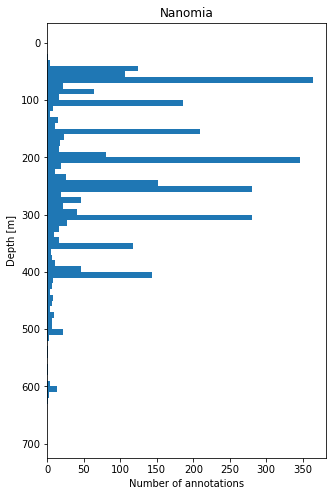

In [37]:
## Plot

plt.figure(figsize = (5, 8))
plt.hist(mars.loc[mars['concept'] != 'Aeginidae', 'depth_meters'],
        bins = range(0, 700, 10),
        orientation = 'horizontal')
plt.xlabel('Number of annotations')
plt.ylabel('Depth [m]')
plt.title('Nanomia')
plt.gca().invert_yaxis()

# Save
plt.savefig('Nanomia_2019.png')

plt.show()

## Filter by month

In [11]:
## Format datetimes

iso_formatted = []
month = []

for dt in mars['index_recorded_timestamp']:
    
    # Convert string to datetime
    try:
        dt = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S.%f') # some datetimes have milliseconds
    except ValueError:
        dt = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
        
    # Save month
    month.append(dt.month)
        
    # Assign UTC timezone
    utc = pytz.UTC
    dt = dt.astimezone(utc)
    
    # Put in ISO format string
    dt = dt.isoformat()
    
    # Save in list
    iso_formatted.append(dt)

mars['eventDate'] = iso_formatted
mars['month'] = month
mars.head()

C:\Users\dianalg\PycharmProjects\PythonScripts\venv\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\dianalg\PycharmProjects\PythonScripts\venv\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index_recorded_timestamp,observation_uuid,activity,concept,observation_group,observer,image_url,depth_meters,latitude,longitude,link_name,link_value,to_concept,associations,video_sequence_name,chief_scientist,eventDate,month
88,2019-10-07 19:01:15.474000,C1CCEEF3-DC29-4592-EB64-0BC18486A11E,transect,Nanomia bijuga,ROV,kwalz,None,249.970001,36.713764,-122.170377,None,None,None,None,Ventana 4216,None,2019-10-08T02:01:15.474000+00:00,10
110,2019-06-03 18:54:16.478000,A5B23D16-4B07-4F71-A36F-FCCDDBBBA01E,transect,Nanomia bijuga,ROV,kwalz,None,199.580002,36.709979,-122.176454,None,None,None,None,Ventana 4195,None,2019-06-04T01:54:16.478000+00:00,6
116,2019-07-23 20:12:58.149000,46FCD089-8CC4-4676-D461-C56B5F5C9F1E,ascend,Nanomia bijuga,ROV,schlin,None,375.940002,36.706177,-122.171456,None,None,None,None,Ventana 4207,None,2019-07-24T03:12:58.149000+00:00,7
118,2019-10-07 19:02:27.506000,4B7E1745-D0AD-4A86-3963-84619686A11E,transect,Nanomia bijuga,ROV,kwalz,None,250.080002,36.714124,-122.170310,None,None,None,None,Ventana 4216,None,2019-10-08T02:02:27.506000+00:00,10
119,2019-10-07 19:05:21.620000,C8DB2FA3-4410-4DEF-C36B-5923C386A11E,transect,Nanomia bijuga,ROV,kwalz,None,249.960007,36.715009,-122.170152,None,None,None,None,Ventana 4216,None,2019-10-08T02:05:21.620000+00:00,10


In [12]:
## Get records for June

jun2019 = mars[mars['month'] == 6]
print(jun2019.shape)
jun2019.head()

(502, 18)


,index_recorded_timestamp,observation_uuid,activity,concept,observation_group,observer,image_url,depth_meters,latitude,longitude,link_name,link_value,to_concept,associations,video_sequence_name,chief_scientist,eventDate,month
110,2019-06-03 18:54:16.478000,A5B23D16-4B07-4F71-A36F-FCCDDBBBA01E,transect,Nanomia bijuga,ROV,kwalz,None,199.580002,36.709979,-122.176454,None,None,None,None,Ventana 4195,None,2019-06-04T01:54:16.478000+00:00,6
196,2019-06-03 19:12:51.175000,2C6FA2D7-7220-4FCE-7464-CC6D05BEA01E,transect,Nanomia bijuga,ROV,kwalz,None,250.149994,36.711014,-122.176535,None,None,None,None,Ventana 4195,None,2019-06-04T02:12:51.175000+00:00,6
316,2019-06-04 19:43:16.728000,58BE9C6E-8916-4C0B-8265-F4643E6CA11E,transect,Nanomia bijuga,ROV,schlin,None,250.210007,36.712585,-122.174723,None,None,None,None,Ventana 4196,None,2019-06-05T02:43:16.728000+00:00,6
489,2019-06-03 19:28:47.800000,7D97E6E5-CBF4-44D5-3D60-57077ED5A01E,transect,Nanomia bijuga,ROV,kwalz,None,300.480011,36.713010,-122.175946,None,None,None,None,Ventana 4195,None,2019-06-04T02:28:47.800000+00:00,6
518,2019-06-11 17:29:10.826000,C3C231CF-2375-4EEB-B66C-566CB91E9F1E,transect,Nanomia bijuga,ROV,kwalz,None,275.410004,36.713799,-122.191399,None,None,None,None,Ventana 4199,None,2019-06-12T00:29:10.826000+00:00,6


## Depth histograms by month

In [13]:
mars['month'].unique()

array([10,  6,  7,  2, 12,  3,  1], dtype=int64)

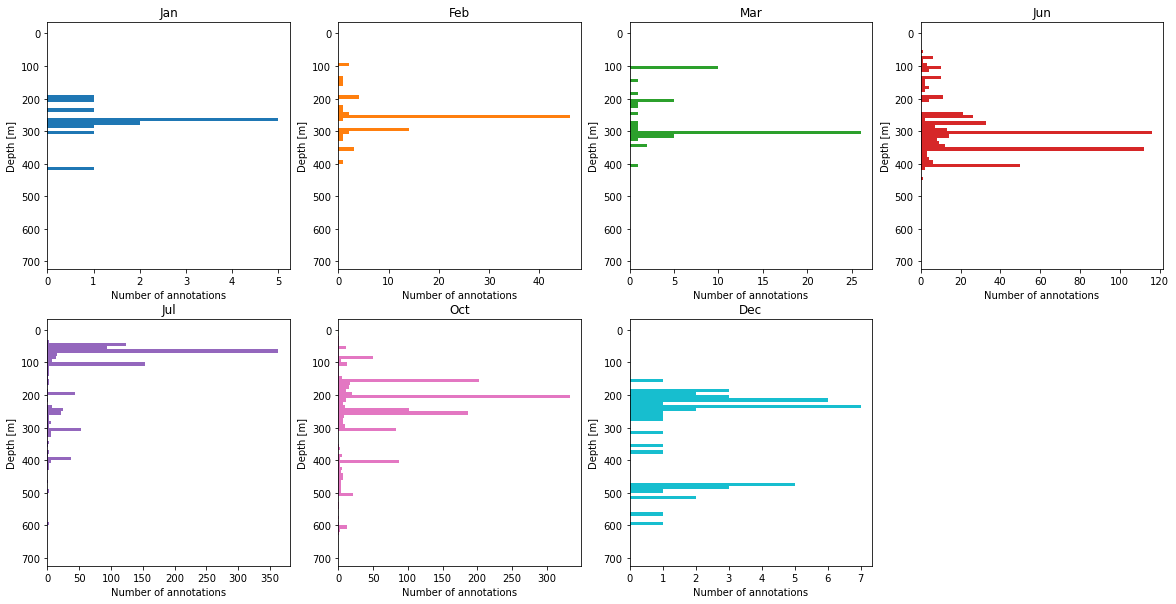

In [38]:
## Plot

fig, ax = plt.subplots(2, 4, figsize = (20, 10))

ax[0, 0].hist(mars.loc[mars['month'] == 1, 'depth_meters'],
              bins = range(0, 700, 10),
              orientation = 'horizontal')
ax[0, 0].set_xlabel('Number of annotations')
ax[0, 0].set_ylabel('Depth [m]')
ax[0, 0].set_title('Jan')
ax[0, 0].invert_yaxis()

ax[0, 1].hist(mars.loc[mars['month'] == 2, 'depth_meters'],
              bins = range(0, 700, 10),
              orientation = 'horizontal',
              color='tab:orange')
ax[0, 1].set_xlabel('Number of annotations')
ax[0, 1].set_ylabel('Depth [m]')
ax[0, 1].set_title('Feb')
ax[0, 1].invert_yaxis()

ax[0, 2].hist(mars.loc[mars['month'] == 3, 'depth_meters'],
              bins = range(0, 700, 10),
              orientation = 'horizontal',
              color='tab:green')
ax[0, 2].set_xlabel('Number of annotations')
ax[0, 2].set_ylabel('Depth [m]')
ax[0, 2].set_title('Mar')
ax[0, 2].invert_yaxis()

ax[0, 3].hist(mars.loc[mars['month'] == 6, 'depth_meters'],
              bins = range(0, 700, 10),
              orientation = 'horizontal',
              color='tab:red')
ax[0, 3].set_xlabel('Number of annotations')
ax[0, 3].set_ylabel('Depth [m]')
ax[0, 3].set_title('Jun')
ax[0, 3].invert_yaxis()

ax[1, 0].hist(mars.loc[mars['month'] == 7, 'depth_meters'],
              bins = range(0, 700, 10),
              orientation = 'horizontal',
              color='tab:purple')
ax[1, 0].set_xlabel('Number of annotations')
ax[1, 0].set_ylabel('Depth [m]')
ax[1, 0].set_title('Jul')
ax[1, 0].invert_yaxis()

ax[1, 1].hist(mars.loc[mars['month'] == 10, 'depth_meters'],
              bins = range(0, 700, 10),
              orientation = 'horizontal',
              color='tab:pink')
ax[1, 1].set_xlabel('Number of annotations')
ax[1, 1].set_ylabel('Depth [m]')
ax[1, 1].set_title('Oct')
ax[1, 1].invert_yaxis()

ax[1, 2].hist(mars.loc[mars['month'] == 12, 'depth_meters'],
              bins = range(0, 700, 10),
              orientation = 'horizontal',
              color='tab:cyan')
ax[1, 2].set_xlabel('Number of annotations')
ax[1, 2].set_ylabel('Depth [m]')
ax[1, 2].set_title('Dec')
ax[1, 2].invert_yaxis()

plt.delaxes(ax=ax[1, 3])

# Save
plt.savefig('Nanomia_2019_monthly.png')

plt.show()

**Notes:**
- counts of annotations only, not organisms
- not normalized by effort
- no Aeginidae annotations found w/i MARS bounding box
- depths not adjusted for location of pressure sensor on ROV or tidal height (error on the order of 10 m)

### Quick exploration into numbers associated with annotations:

In [30]:
mars[mars['link_name'] == 'population-quantity'] ## ~5 records, 999 is link_value
mars[mars['link_name'] == 'population-density'] ## 1 record, 'dense' is link value

,index_recorded_timestamp,observation_uuid,activity,concept,observation_group,observer,image_url,depth_meters,latitude,longitude,link_name,link_value,to_concept,associations,video_sequence_name,chief_scientist,eventDate,month
20390,2019-07-23 17:43:26.186000,FFA09848-F82B-489A-3F67-A1B145AB9E1E,descend,Nanomia bijuga,ROV,schlin,None,65.57,36.709873,-122.178584,population-density,dense,self,population-density | self | dense,Ventana 4207,None,2019-07-24T00:43:26.186000+00:00,7


### Quick exploration into ROV effort

In [35]:
## Number of dives?

mars['video_sequence_name'].unique()

array(['Ventana 4216', 'Ventana 4195', 'Ventana 4207', 'Ventana 4217',
       'Ventana 4196', 'Ventana 4199', 'Ventana 4178', 'Ventana 4242',
       'Ventana 4185', 'Ventana 4206', 'Ventana 4175'], dtype=object)

## Request 2: Depth profile for Nanomia and Aeginura between MARS and M1

MARS location: (36.7125, -122.1869) <br>
M1 location: (36.75, -122.03) <br>
Distance between them: ~ 15 km <br>

Let's consider annotations within a circle whose center is at the midpoint between MARS and M1 (36.7325, -122.1067) with a radius of 9 km (~ 0.100899 decimal degrees).

### Obtain data from VARS

In [37]:
## Build SQL query

sql = """
        SELECT index_recorded_timestamp,
               observation_uuid,
               activity,
               concept,
               observation_group,
               observer,
               image_url,
               depth_meters,
               latitude,
               longitude,
               link_name,
               link_value,
               to_concept,
               associations,
               video_sequence_name,
               chief_scientist
        FROM annotations a
        WHERE concept LIKE 'Nanomia%'
            OR concept LIKE 'Aeginidae%'
"""

In [38]:
## Query the database

# Get connection
conn = VARS.get_db_conn(dr, url, un, pw, name)

# Submit query
data2 = VARS.get_data(conn, sql)

# Close connection
conn.close()

In [39]:
## Check data is there

print(data2.shape)
data2.head()

(400599, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1996-09-19 20:20:18,5D39EFA1-9B62-444B-BE0D-D11A1319C159,transect,Nanomia bijuga,ROV,robs,None,497.700012,36.711983,-122.065404,suspect-navigation-ctd-other-data,Unreliable CTD data,self,suspect-navigation-ctd-other-data | self | Unr...,Ventana 1140,Bruce Robison
1,2005-09-02 18:15:25,AA2A99F7-CE58-4BF3-813A-FD246496A064,transect,Nanomia bijuga,ROV,oska,None,500.440002,36.708362,-122.068094,alternate timecode,01:26:06:23,self,alternate timecode | self | 01:26:06:23,Ventana 2715,Bruce Robison
2,2015-06-18 21:13:44,CC0BB6A2-B147-462D-B9B8-80A420974A5E,ascend,Nanomia bijuga,ROV,linda,None,363.700012,36.705839,-121.993508,population-quantity,999,self,population-quantity | self | 999,Ventana 3834,Stephanie Bush
3,2004-03-09 22:19:32,6C70EACB-12E6-45AA-BF35-41C55F4A9A82,ascend,Nanomia bijuga,ROV,svonthun,None,234.899994,36.703133,-122.064018,alternate timecode,06:11:04:06,self,alternate timecode | self | 06:11:04:06,Ventana 2495,Bruce Robison
4,1996-06-17 21:36:19,852739C8-989F-4DEB-8EDC-BCBBDFE19086,ascend,Nanomia bijuga,ROV,kwalz,None,376.850006,36.688449,-122.053892,suspect-navigation-ctd-other-data,No CTD data,self,suspect-navigation-ctd-other-data | self | No ...,Ventana 1082,Bruce Robison


In [40]:
## Add column names

data2.rename(columns={
    0:'index_recorded_timestamp',
    1:'observation_uuid',
    2:'activity',
    3:'concept',
    4:'observation_group',
    5:'observer',
    6:'image_url',
    7:'depth_meters',
    8:'latitude',
    9:'longitude',
    10:'link_name',
    11:'link_value',
    12:'to_concept',
    13:'associations',
    14:'video_sequence_name',
    15:'chief_scientist'
}, inplace=True)

data2.head()

,index_recorded_timestamp,observation_uuid,activity,concept,observation_group,observer,image_url,depth_meters,latitude,longitude,link_name,link_value,to_concept,associations,video_sequence_name,chief_scientist
0,1996-09-19 20:20:18,5D39EFA1-9B62-444B-BE0D-D11A1319C159,transect,Nanomia bijuga,ROV,robs,None,497.700012,36.711983,-122.065404,suspect-navigation-ctd-other-data,Unreliable CTD data,self,suspect-navigation-ctd-other-data | self | Unr...,Ventana 1140,Bruce Robison
1,2005-09-02 18:15:25,AA2A99F7-CE58-4BF3-813A-FD246496A064,transect,Nanomia bijuga,ROV,oska,None,500.440002,36.708362,-122.068094,alternate timecode,01:26:06:23,self,alternate timecode | self | 01:26:06:23,Ventana 2715,Bruce Robison
2,2015-06-18 21:13:44,CC0BB6A2-B147-462D-B9B8-80A420974A5E,ascend,Nanomia bijuga,ROV,linda,None,363.700012,36.705839,-121.993508,population-quantity,999,self,population-quantity | self | 999,Ventana 3834,Stephanie Bush
3,2004-03-09 22:19:32,6C70EACB-12E6-45AA-BF35-41C55F4A9A82,ascend,Nanomia bijuga,ROV,svonthun,None,234.899994,36.703133,-122.064018,alternate timecode,06:11:04:06,self,alternate timecode | self | 06:11:04:06,Ventana 2495,Bruce Robison
4,1996-06-17 21:36:19,852739C8-989F-4DEB-8EDC-BCBBDFE19086,ascend,Nanomia bijuga,ROV,kwalz,None,376.850006,36.688449,-122.053892,suspect-navigation-ctd-other-data,No CTD data,self,suspect-navigation-ctd-other-data | self | No ...,Ventana 1082,Bruce Robison


### Filter by location

In [41]:
## Filter

data2['distance'] = (data2['longitude'] + 122.1067)**2 + (data2['latitude'] - 36.7325)**2
data2 = data2[data2['distance'] <= 0.100899**2]

print(data2.shape)
data2.head()

(298726, 17)


,index_recorded_timestamp,observation_uuid,activity,concept,observation_group,observer,image_url,depth_meters,latitude,longitude,link_name,link_value,to_concept,associations,video_sequence_name,chief_scientist,distance
0,1996-09-19 20:20:18,5D39EFA1-9B62-444B-BE0D-D11A1319C159,transect,Nanomia bijuga,ROV,robs,None,497.700012,36.711983,-122.065404,suspect-navigation-ctd-other-data,Unreliable CTD data,self,suspect-navigation-ctd-other-data | self | Unr...,Ventana 1140,Bruce Robison,0.002126
1,2005-09-02 18:15:25,AA2A99F7-CE58-4BF3-813A-FD246496A064,transect,Nanomia bijuga,ROV,oska,None,500.440002,36.708362,-122.068094,alternate timecode,01:26:06:23,self,alternate timecode | self | 01:26:06:23,Ventana 2715,Bruce Robison,0.002073
3,2004-03-09 22:19:32,6C70EACB-12E6-45AA-BF35-41C55F4A9A82,ascend,Nanomia bijuga,ROV,svonthun,None,234.899994,36.703133,-122.064018,alternate timecode,06:11:04:06,self,alternate timecode | self | 06:11:04:06,Ventana 2495,Bruce Robison,0.002684
4,1996-06-17 21:36:19,852739C8-989F-4DEB-8EDC-BCBBDFE19086,ascend,Nanomia bijuga,ROV,kwalz,None,376.850006,36.688449,-122.053892,suspect-navigation-ctd-other-data,No CTD data,self,suspect-navigation-ctd-other-data | self | No ...,Ventana 1082,Bruce Robison,0.004729
5,2007-08-20 17:37:21,C558DECF-6389-4F43-BAF8-7078D36C92C6,transect,Nanomia bijuga,ROV,kwalz,None,399.309998,36.704480,-122.051723,alternate timecode,01:25:08:14,self,alternate timecode | self | 01:25:08:14,Ventana 3066,Bruce Robison,0.003808


### Save, if desired

In [45]:
## Save

data2.to_csv('VARS_NanomiaAeginidae_1989-2020.csv', index=False, na_rep='NaN')

### Load, if desired

In [3]:
## Load

data2 = pd.read_csv('VARS_NanomiaAeginidae_1989-2020.csv', dtype={'link_name': str,
                                                                 'link_value': str,
                                                                 'to_concept': str,
                                                                 'associations': str})

print(data2.shape)
data2.head()

(298726, 17)


,index_recorded_timestamp,observation_uuid,activity,concept,observation_group,observer,image_url,depth_meters,latitude,longitude,link_name,link_value,to_concept,associations,video_sequence_name,chief_scientist,distance
0,1996-09-19 20:20:18,5D39EFA1-9B62-444B-BE0D-D11A1319C159,transect,Nanomia bijuga,ROV,robs,NaN,497.700012,36.711983,-122.065404,suspect-navigation-ctd-other-data,Unreliable CTD data,self,suspect-navigation-ctd-other-data | self | Unr...,Ventana 1140,Bruce Robison,0.002126
1,2005-09-02 18:15:25,AA2A99F7-CE58-4BF3-813A-FD246496A064,transect,Nanomia bijuga,ROV,oska,NaN,500.440002,36.708362,-122.068094,alternate timecode,01:26:06:23,self,alternate timecode | self | 01:26:06:23,Ventana 2715,Bruce Robison,0.002073
2,2004-03-09 22:19:32,6C70EACB-12E6-45AA-BF35-41C55F4A9A82,ascend,Nanomia bijuga,ROV,svonthun,NaN,234.899994,36.703133,-122.064018,alternate timecode,06:11:04:06,self,alternate timecode | self | 06:11:04:06,Ventana 2495,Bruce Robison,0.002684
3,1996-06-17 21:36:19,852739C8-989F-4DEB-8EDC-BCBBDFE19086,ascend,Nanomia bijuga,ROV,kwalz,NaN,376.850006,36.688449,-122.053892,suspect-navigation-ctd-other-data,No CTD data,self,suspect-navigation-ctd-other-data | self | No ...,Ventana 1082,Bruce Robison,0.004729
4,2007-08-20 17:37:21,C558DECF-6389-4F43-BAF8-7078D36C92C6,transect,Nanomia bijuga,ROV,kwalz,NaN,399.309998,36.704480,-122.051723,alternate timecode,01:25:08:14,self,alternate timecode | self | 01:25:08:14,Ventana 3066,Bruce Robison,0.003808


### Plot locations

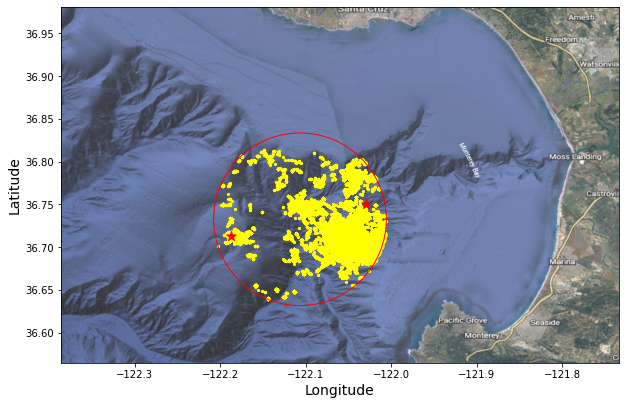

In [4]:
## Plot lat, lons

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

mars_img=mpimg.imread('Monterey Bay.png')
ax = data2.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 8), color='yellow', marker='.')

plt.scatter([-122.1869, -122.03], [36.7125, 36.75], color='red', marker='*', s=100)

rect = patches.Circle((-122.1067, 36.7325), radius=0.100899, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.imshow(mars_img, extent=[-122.386111, -121.7338889, 36.56472, 36.981111], alpha=0.8)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Save
plt.savefig('Nanomia_Aeginidae_near_MARS_M1_map.png')

plt.show()

### Explore

In [5]:
## There are only 8 records of Aeginidae in the entire data set

aeg = data2[data2['concept'] == 'Aeginidae'].copy()
aeg.shape

(8, 17)

In [6]:
## The rest (almost 300,000 records) are Nanomia (Nanomia bijuga, Nanomia, Nanomia 2)

nan = data2[data2['concept'].isin(['Nanomia bijuga', 'Nanomia', 'Nanomia 2'])].copy()
nan.shape

(298718, 17)

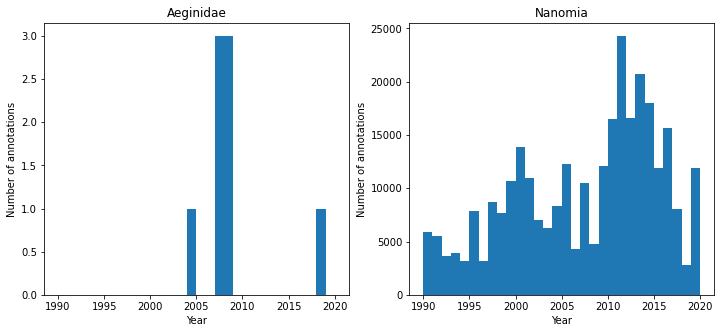

In [7]:
## How are these distributed across years?

# function to format dates and create month and year columns
def get_year_month(df):
    
    iso_formatted = []
    year = []
    year_month = []

    for dt in df['index_recorded_timestamp']:
    
        # Convert string to datetime
        try:
            dt = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S.%f') # some datetimes have milliseconds
        except ValueError:
            dt = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')

        # Save month and year
        year.append(dt.year)
        year_month.append(str(dt.year) + '_' + str(dt.month))

        # Assign UTC timezone
        utc = pytz.UTC
        dt = dt.astimezone(utc)

        # Put in ISO format string
        dt = dt.isoformat()

        # Save in list
        iso_formatted.append(dt)

    df['eventDate'] = iso_formatted
    df['year'] = year
    df['year_month'] = year_month
    
    return(df)
    
# format
nan = get_year_month(nan)
aeg = get_year_month(aeg)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(aeg['year'], bins=range(1990, 2021))
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of annotations')
ax[0].set_title('Aeginidae')

ax[1].hist(nan['year'], bins=range(1990, 2021))
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of annotations')
ax[1].set_title('Nanomia')

plt.show()

### Create depth profile

In [21]:
## Aggregate data

# Create depth categories
depth_cat = pd.cut(nan['depth_meters'], bins=range(0, 1100, 100))
nan['depth_cat'] = depth_cat

# Find monthly numbers of annotations at each depth category
month_depth_summary = nan.groupby(['year_month', 'depth_cat'])['concept'].count()
month_depth_summary = month_depth_summary.reset_index()

# Create a year column
month_depth_summary['year'] = month_depth_summary['year_month'].str.split('_').str[0]

# Average across months within a year
yearly_summary = month_depth_summary.groupby(['year', 'depth_cat']).agg(
    count=('concept', 'count'),
    mean=('concept', 'mean')
)
yearly_summary = yearly_summary.reset_index()

In [23]:
## Pivot and convert to array

pivoted = yearly_summary.pivot(index='depth_cat', columns='year', values='mean')
pivoted_arr = pivoted.to_numpy()

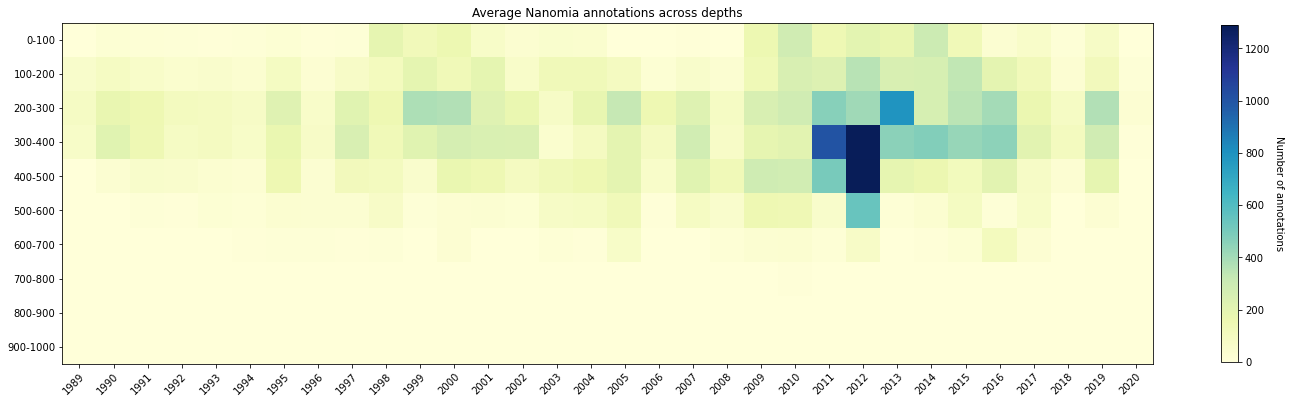

In [24]:
# Plot

years = [str(yr) for yr in range(1989, 2021)]
depths = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']

fig, ax = plt.subplots(figsize=(20, 12))

im = ax.imshow(pivoted_arr, cmap='YlGnBu')

ax.set_xticks(np.arange(len(years)))
ax.set_yticks(np.arange(len(depths)))
ax.set_xticklabels(years)
ax.set_yticklabels(depths)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

cbar = ax.figure.colorbar(im, ax=ax, shrink=0.4)
cbar.ax.set_ylabel('Number of annotations', rotation=-90, va="bottom")

ax.set_title('Average Nanomia annotations across depths')
fig.tight_layout()

# Save
plt.savefig('Nanomia_near_MARS_M1_depth.png')

plt.show()

One thing not accounted for (part of ROV effort): Were there dives to 1000 meters in every month of every year?

### Save summarized data

In [14]:
## Save month_depth_summary

month_depth_summary.rename(columns={'concept':'num_annotations'}, inplace=True)
month_depth_summary.to_csv('VARS_Nanomia_1989-2020_month_depth_summary.csv', index=False, na_rep='NaN')

In [29]:
## Save yearly_summary

yearly_summary.rename(columns={'count':'n', 'mean':'average_annotations'}, inplace=True)
yearly_summary.to_csv('VARS_Nanomia_1989-2020_yearly_summary.csv', index=False, na_rep='NaN')

In [31]:
## Save pivoted

pivoted.to_csv('VARS_Nanomia_1989-2020_yearly_summary_pivoted.csv', index=False, na_rep='NaN')